# Module 4: Fourier Transforms

### PROBLEM 1 (20 pts.; 50/50 for code & discussion) 
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(10 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(10 pts.)*


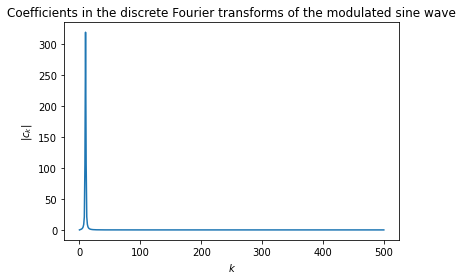

In [12]:
import numpy as np
import pylab as plt

N = 1000  
def dft(y):
    N = len(y)
    c = np.zeros(N // 2 + 1, complex)
    for k in range(N // 2 + 1):
        for n in range(N):
            c[k] += y[n] * np.exp(-2j * np.pi * k * n / N)
    return c

wave = np.zeros(N, float)
for n in range(N):
    wave[n] = np.sin(np.pi * n / N) * np.sin(20 * np.pi * n / N)

plt.plot(abs(dft(wave)))
plt.xlabel('$k$')
plt.ylabel("$|c_k|$")
plt.title("Coefficients in the discrete Fourier transforms of the modulated sine wave")
plt.show()


**PROBLEM 1 DISCUSSION**\
Initially, I have defined a function that would calculate the coefficients of the discrete Fourier transforms of a given set of values. A nested 'for' loop was used in this process. Then, an array of values was calculated by evaluating the given modulated sine wave from $N=0$ to $N=1000$. This array was then inputted to the predefined function to calculate the needed coefficients. Finally, their amplitudes were plotted on a graph, which shows an evident spike that corresponds to the frequency of the wave.

### PROBLEM 2 (30 pts.; 50/50 for code & discussion)

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(5 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(10 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(5 pts.)* 

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(10 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [4]:
file_path = "/content/drive/My Drive/Colab Notebooks/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [ ]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
``` 

In [ ]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

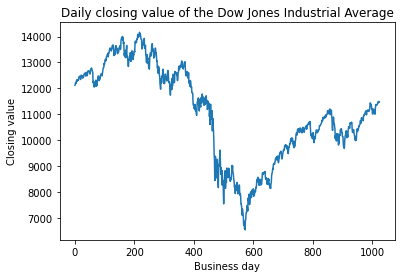

In [5]:
import numpy as np
import pylab as plt
dow = np.loadtxt(file_path+"dow.txt")
plt.plot(dow)
plt.xlabel("Business day")
plt.ylabel("Closing value")
plt.title("Daily closing value of the Dow Jones Industrial Average")
plt.show()

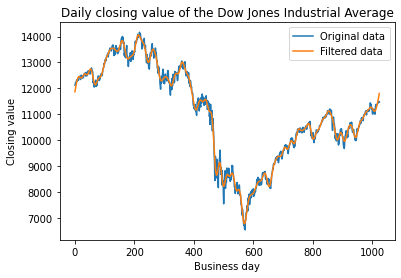

In [13]:
dow2=np.fft.rfft(dow)
N=round(len(dow2)*0.10)
dow2[N:]=0
plt.plot(dow,label="Original data")
plt.plot(np.fft.irfft(dow2),label="Filtered data")
plt.xlabel("Business day")
plt.ylabel("Closing value")
plt.title("Daily closing value of the Dow Jones Industrial Average")
plt.legend()
plt.show()

**PROBLEM 2 DISCUSSION**\
After importing the given text file, the coefficients of the discrete Fourier transform (DFT) of the data was calculated using the function $\tt rfft$. All elements of the array were set to zero except the first 10%.The data was then transformed back using the function $\tt irfft$, and the output was plotted superimposing the graph of the original data. The manipulated data follows the general trend of the original data. Setting the last 90% to zero filtered out the sharp noise of the original data. This tells us that the largest coefficients of the DFT, which corresponds to the frequency of the main visible wave, were found in the first 10% since the general behavior of the graph was still preserved.


### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Real-world Application: Image deconvolution**

_Refer to Exercise 7.9 of the Newman text_ For this problem, you will use data from a text file called $\tt blur.txt$. It contains a grid of values representing brightness on a black-and-white photo-- a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. 

Similar to what you did for Problem 2, you need to make a copy of the file $\tt blur.txt$ and save it to the same folder in your **own Google Drive** where you saved $\tt dow.txt$. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

1. Use numpy's $\tt loadtxt$ to load the grid of values into a two-dimensional array of real numbers, e.g.:
```
blur = np.loadtxt(file_path+"blur.txt")
``` 
Plot the values on the screen of the computer as a density plot. (Hint: Use $\tt imshow$ and $\tt show$ from the pylab package.) You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.) *(10 pts.)*

2. Create an array of the point spread function (PSF), of the same size as the photo, based on the Gaussian function $f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$. In particular, get the sum of 4 Gaussians with $\sigma = 25$ centered on each of the four corners of the image. _Refer to the figure on page 325 of the Newman text._ *(10 pts.)*

3. Make a density plot of these values on the screen, so that you get a visualization of your point spread function. *(10 pts.)*

3. Apply Fourier transforms using the functions $\tt rfft2$ and $\tt irfft2$ from numpy's $\tt fft$ package to perform image deconvolution as follows:

* Get Fourier transforms of both the blurred image and the PSF from (1) and (2) 
* Divide one by the other
* Perform an inverse transform to get the unblurred photo
* Display the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. *(20 pts.)*

   Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very
large number (because you're dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it-- just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$. 

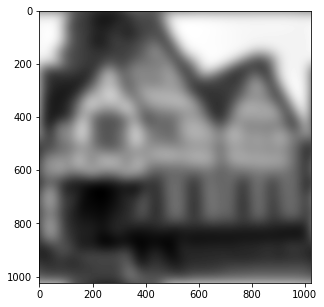

In [7]:
from pylab import show, imshow, figure
from numpy.fft import rfft2, irfft2
from numpy import exp, empty, zeros, loadtxt

blur = loadtxt(file_path+"blur.txt")

figure(figsize=(5,5))
imshow(blur, cmap='gray')
show()


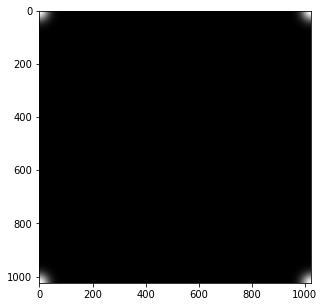

In [8]:
figure(figsize=(5,5))
row, col = blur.shape

sigma=25
def Gauss(x, y):
    return exp(- ( x ** 2 + y ** 2 ) / (2 * sigma ** 2))
point_spread=zeros([row,col])
for i in range(row):
    for j in range(col):
        if i < row/2:
           if j < col/2: 
             point_spread[i, j] = Gauss(i,j) #top-left corner
           else:
            point_spread[i, j] = Gauss(i,j-col) #top-right corner
        if i >= row/2:
          if j < col/2:
            point_spread[i, j] = Gauss(i-row, j) #bottom-left corner
          else:
            point_spread[i, j] = Gauss(i-row, j-col) #bottom-right corner

imshow(point_spread, cmap="gray")
show()

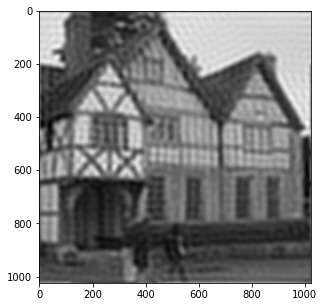

In [11]:
# Deconvolution

# Fourier transforms
blur_ft = rfft2(blur)
point_spread_ft = rfft2(point_spread)

row,col=point_spread_ft.shape
blur_clear = zeros([row,col], complex)
epsilon = 10 ** -3
for i in range(row):
    for j in range(col):
        if abs(point_spread_ft[i, j]) < epsilon:
            blur_clear[i, j] = blur_ft[i, j]
        else:
            blur_clear[i, j] = blur_ft[i, j] / (point_spread_ft[i, j])
            
figure(figsize=(5,5))
imshow(irfft2(blur_clear), cmap='gray')
show()

**Problem 3 Discussion**\
First, a text file was loaded which contains the data for a blurred image. The image was shown using a density plot with a gray colormap. In order to enhance the image, we need to determine the point spread function (psf). This was calculated using the given the Gaussian function with $\sigma=25$. To produce the 4 bright spots of the psf presented in Newman text, I have to manipulate the input row and column numbers. Basically, I flipped the order of the iterated row and/or column number depending on the corner I was referring to since the bright spot was only located at the upper-left corner if I iterate each element as is. After, the resulting psf was visualized.

Both the data and the psf were tranformed using $\tt rfft2$, and their quotient was calculated. To bypass the instances of division by zero, all entries less than $10^{-3}$ retained their original value. Finally, after transforming the output using $\tt irfft2$ and showing its density plot, the clearer version of the blurred image was produced.
